In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/COVID_TA

/content/drive/MyDrive/COVID_TA


In [3]:
ls

 CLAHE/               IM00001.tif           'Selected Covidset'@
'Gaussian + CLAHE'/   Normal1.tif
'Gaussian Filter'/   'Normalized dataset'/


In [4]:
# import the necessary packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
#Normalized dataset Covid
import PIL.Image as pil_image
import io
path ='/content/drive/MyDrive/COVID_TA/Selected Covidset/Covid/'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    array=np.array(img)
    max_val=np.amax(array)
    normalized=(array/max_val)
    im = pil_image.fromarray(normalized)
    if path_no < 10 :
      save_path='/content/drive/MyDrive/COVID_TA/Normalized dataset/Covid/' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='/content/drive/MyDrive/COVID_TA/Normalized dataset/Covid/' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='/content/drive/MyDrive/COVID_TA/Normalized dataset/Covid/' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

print("Normalized Success")

In [ ]:
#Normalized dataset Normal
import PIL.Image as pil_image
import io
path ='/content/drive/MyDrive/COVID_TA/Selected Covidset/Normal/'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    array=np.array(img)
    max_val=np.amax(array)
    normalized=(array/max_val)
    im = pil_image.fromarray(normalized)
    if path_no < 10 :
      save_path='/content/drive/MyDrive/COVID_TA/Normalized dataset/Normal/' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='/content/drive/MyDrive/COVID_TA/Normalized dataset/Normal/' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='/content/drive/MyDrive/COVID_TA/Normalized dataset/Normal/' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

print("Normalized Success")

Normalized Success


In [ ]:
#Gaussian Filter Covid
import cv2
from skimage import io
from skimage.filters import gaussian
path ='/content/drive/MyDrive/COVID_TA/Normalized dataset/Covid/'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    img = np.array(img)
    gausfilter = gaussian(img, sigma=1, mode='constant', cval=0.0)
    im = Image.fromarray(gausfilter)
    if path_no < 10 :
      save_path='/content/drive/MyDrive/COVID_TA/Gaussian Filter/Covid/' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='/content/drive/MyDrive/COVID_TA/Gaussian Filter/Covid/' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='/content/drive/MyDrive/COVID_TA/Gaussian Filter/Covid/' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

print("Denoissing Success")

Denoissing Success


In [ ]:
#Gaussian Filter Normal
import cv2
from skimage import io
from skimage.filters import gaussian
path ='/content/drive/MyDrive/COVID_TA/Normalized dataset/Normal/'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    img = np.array(img)
    gausfilter = gaussian(img, sigma=1, mode='constant', cval=0.0)
    im = Image.fromarray(gausfilter)
    if path_no < 10 :
      save_path='/content/drive/MyDrive/COVID_TA/Gaussian Filter/Normal/' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='/content/drive/MyDrive/COVID_TA/Gaussian Filter/Normal/' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='/content/drive/MyDrive/COVID_TA/Gaussian Filter/Normal/' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

print("Denoissing Success")

Denoissing Success


In [ ]:
#CLAHE Covid
from skimage import exposure
path ='/content/drive/MyDrive/COVID_TA/Normalized dataset/Covid/'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    img = np.array(img)
    clahe = exposure.equalize_adapthist(img)
    im = Image.fromarray(clahe)
    if path_no < 10 :
      save_path='/content/drive/MyDrive/COVID_TA/CLAHE/Covid/' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='/content/drive/MyDrive/COVID_TA/CLAHE/Covid/' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='/content/drive/MyDrive/COVID_TA/CLAHE/Covid/' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

print("CLAHE Success")

CLAHE Success


In [ ]:
#CLAHE Normal
from skimage import exposure
path ='/content/drive/MyDrive/COVID_TA/Normalized dataset/Normal/'
path_no = 1
for paths in os.listdir(path) :
  if paths.endswith(".tif"):
    filepath = os.path.join(path, paths)
    img = Image.open(filepath)
    img = np.array(img)
    clahe = exposure.equalize_adapthist(img)
    im = Image.fromarray(clahe)
    if path_no < 10 :
      save_path='/content/drive/MyDrive/COVID_TA/CLAHE/Normal/' + str('IM0000') +str(path_no) + '.tif'
    elif path_no <100 :
      save_path='/content/drive/MyDrive/COVID_TA/CLAHE/Normal/' + str('IM000') +str(path_no) + '.tif'
    else :
      save_path='/content/drive/MyDrive/COVID_TA/CLAHE/Normal/' + str('IM00') +str(path_no) + '.tif'
    im.save(save_path,'TIFF') 
    path_no +=1

print("CLAHE Success")

CLAHE Success


In [5]:
import cv2

im = cv2.imread('/content/drive/MyDrive/COVID_TA/CLAHE/Covid/IM00001.tif', -1)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

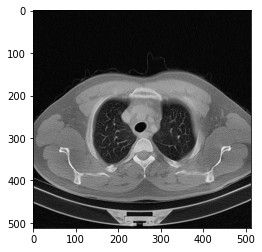

In [6]:
plt.imshow(im_rgb)

In [7]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Normalized dataset") 
data = []
labels = []

[INFO] loading images...


In [8]:
width = 224
height = 224
dsize = (width, height)
# loop over our input images
for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
    image = cv2.imread(imagePath,-1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #image = image.convert('L')
    image = cv2.resize(image,dsize)
    image = np.array(image)
    data.append(image)

  # extract the class label from the file path and update the
	# labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

Normal


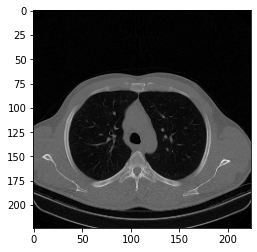

In [9]:
print(labels[0])
plt.imshow(data[0])

In [10]:
print(labels)

['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
labels = encoder.transform(labels)

In [12]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [13]:
data = np.array(data)
data.shape

(1000, 224, 224, 3)

In [14]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(750, 224, 224, 3)
(250, 224, 224, 3)
(750,)
(250,)


In [15]:
print(trainX[0])

[[[0.01328921 0.01328921 0.01328921]
  [0.0033055  0.0033055  0.0033055 ]
  [0.01843234 0.01843234 0.01843234]
  ...
  [0.0021962  0.0021962  0.0021962 ]
  [0.00847291 0.00847291 0.00847291]
  [0.01539764 0.01539764 0.01539764]]

 [[0.00058266 0.00058266 0.00058266]
  [0.03222017 0.03222017 0.03222017]
  [0.00598724 0.00598724 0.00598724]
  ...
  [0.00910051 0.00910051 0.00910051]
  [0.01266156 0.01266156 0.01266156]
  [0.00043513 0.00043513 0.00043513]]

 [[0.0080247  0.0080247  0.0080247 ]
  [0.00934503 0.00934503 0.00934503]
  [0.00555772 0.00555772 0.00555772]
  ...
  [0.0025175  0.0025175  0.0025175 ]
  [0.01057748 0.01057748 0.01057748]
  [0.02421787 0.02421787 0.02421787]]

 ...

 [[0.0279024  0.0279024  0.0279024 ]
  [0.0052198  0.0052198  0.0052198 ]
  [0.00604538 0.00604538 0.00604538]
  ...
  [0.01091583 0.01091583 0.01091583]
  [0.02447781 0.02447781 0.02447781]
  [0.02602714 0.02602714 0.02602714]]

 [[0.02472242 0.02472242 0.02472242]
  [0.04005009 0.04005009 0.04005009]


1


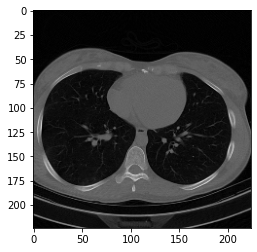

In [16]:
plt.imshow(trainX[0])
print(trainY[0])

In [220]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

In [221]:
CLASS_NUM = 2
BATCH_SIZE = 32
EPOCH_STEPS = int(4323/BATCH_SIZE)
IMAGE_SHAPE = (224, 224, 3)

In [222]:
def inception(x, filters):
    # 1x1
    path1 = Conv2D(filters=filters[0], kernel_size=(1,1), strides=1, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu')(x)

    # 1x1->3x3
    path2 = Conv2D(filters=filters[1][0], kernel_size=(1,1), strides=1, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu')(x)
    path2 = Conv2D(filters=filters[1][1], kernel_size=(3,3), strides=1, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu')(path2)
    
    # 1x1->5x5
    path3 = Conv2D(filters=filters[2][0], kernel_size=(1,1), strides=1, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu')(x)
    path3 = Conv2D(filters=filters[2][1], kernel_size=(5,5), strides=1, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu')(path3)

    # 3x3->1x1
    path4 = MaxPooling2D(pool_size=(3,3), strides=1, padding='same')(x)
    path4 = Conv2D(filters=filters[3], kernel_size=(1,1), strides=1, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu')(path4)

    return Concatenate(axis=-1)([path1,path2,path3,path4])

In [223]:
def auxiliary(x, name=None):
    layer = AveragePooling2D(pool_size=(5,5), strides=3, padding='valid')(x)
    layer = Conv2D(filters=128, kernel_size=(1,1), strides=1, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu')(layer)
    layer = Flatten()(layer)
    layer = Dense(units=256, activation='relu')(layer)
    layer = Dropout(0.4)(layer)
    layer = Dense(units=CLASS_NUM, activation='softmax', name=name)(layer)
    return layer

In [224]:
def googlenet():
    layer_in = Input(shape=IMAGE_SHAPE)
    
    # stage-1
    layer = Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu')(layer_in)
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    layer = BatchNormalization()(layer)

    # stage-2
    layer = Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu')(layer)
    layer = Conv2D(filters=192, kernel_size=(3,3), strides=1, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu')(layer)
    layer = BatchNormalization()(layer)
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)

    # stage-3
    layer = inception(layer, [ 64,  (96,128), (16,32), 32]) #3a
    layer = inception(layer, [128, (128,192), (32,96), 64]) #3b
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    
    # stage-4
    layer = inception(layer, [192,  (96,208),  (16,48),  64]) #4a
    aux1  = auxiliary(layer, name='aux1')
    layer = inception(layer, [160, (112,224),  (24,64),  64]) #4b
    layer = inception(layer, [128, (128,256),  (24,64),  64]) #4c
    layer = inception(layer, [112, (144,288),  (32,64),  64]) #4d
    aux2  = auxiliary(layer, name='aux2')
    layer = inception(layer, [256, (160,320), (32,128), 128]) #4e
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    
    # stage-5
    layer = inception(layer, [256, (160,320), (32,128), 128]) #5a
    layer = inception(layer, [384, (192,384), (48,128), 128]) #5b
    layer = AveragePooling2D(pool_size=(7,7), strides=1, padding='valid')(layer)
    
    # stage-6
    layer = Flatten()(layer)
    layer = Dropout(0.4)(layer)
    layer = Dense(units=256, activation='linear')(layer)
    main = Dense(units=CLASS_NUM, activation='softmax', name='main')(layer)
    
    model = Model(inputs=layer_in, outputs=[main, aux1, aux2])
    
    return model

In [225]:
model = googlenet()
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_590 (Conv2D)             (None, 112, 112, 64) 9472        input_11[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_130 (MaxPooling2D (None, 56, 56, 64)   0           conv2d_590[0][0]                 
__________________________________________________________________________________________________
batch_normalization_20 (BatchNo (None, 56, 56, 64)   256         max_pooling2d_130[0][0]          
___________________________________________________________________________________________

In [227]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_GoogleNet.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [228]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adamax

# train the model using the 5 optimizer
print("[INFO] training network...")
opt = SGD(learning_rate=0.0001, decay=1e-6)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[es, checkpoint])

[INFO] training network...
Epoch 1/50
24/24 [==============================] - 10s 152ms/step - loss: 88.5871 - main_loss: 0.7465 - aux1_loss: 0.9832 - aux2_loss: 0.7144 - main_accuracy: 0.4747 - aux1_accuracy: 0.4707 - aux2_accuracy: 0.5120 - val_loss: 88.2178 - val_main_loss: 0.6932 - val_aux1_loss: 0.6930 - val_aux2_loss: 0.6930 - val_main_accuracy: 0.4680 - val_aux1_accuracy: 0.5320 - val_aux2_accuracy: 0.5960
Epoch 2/50
24/24 [==============================] - 2s 89ms/step - loss: 88.4628 - main_loss: 0.7156 - aux1_loss: 0.9086 - aux2_loss: 0.7039 - main_accuracy: 0.5067 - aux1_accuracy: 0.4760 - aux2_accuracy: 0.5533 - val_loss: 88.2091 - val_main_loss: 0.6932 - val_aux1_loss: 0.6927 - val_aux2_loss: 0.6931 - val_main_accuracy: 0.4680 - val_aux1_accuracy: 0.5320 - val_aux2_accuracy: 0.4680
Epoch 3/50
24/24 [==============================] - 2s 89ms/step - loss: 88.4030 - main_loss: 0.7138 - aux1_loss: 0.8630 - aux2_loss: 0.7000 - main_accuracy: 0.4720 - aux1_accuracy: 0.5173 - au

dict_keys(['loss', 'main_loss', 'aux1_loss', 'aux2_loss', 'main_accuracy', 'aux1_accuracy', 'aux2_accuracy', 'val_loss', 'val_main_loss', 'val_aux1_loss', 'val_aux2_loss', 'val_main_accuracy', 'val_aux1_accuracy', 'val_aux2_accuracy'])


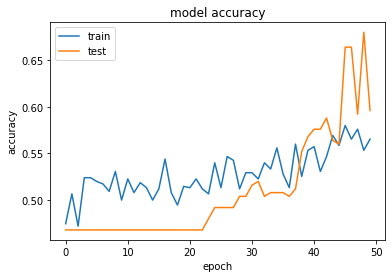

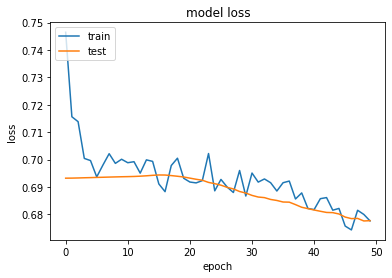

In [229]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['main_accuracy'])
plt.plot(H.history['val_main_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['main_loss'])
plt.plot(H.history['val_main_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [230]:
predictions = model.predict(testX, batch_size=32)

In [231]:
predictions=np.array(predictions)
print(predictions.argmax(axis=0))

[[1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [2 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 2]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [2 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [2 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 2]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [2 1]
 [2 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [2 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [2 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [2 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 2]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]

In [232]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [233]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
predictions=np.argmax(predictions,axis=0)
print(classification_report(testY,predictions.argmax(axis=1),zero_division=0,target_names = encoder.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       Covid       0.93      0.88      0.90       133
      Normal       0.87      0.92      0.90       117

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



In [234]:
cf_matrix = confusion_matrix(testY,predictions.argmax(axis=1))
print(cf_matrix)

[[117  16]
 [  9 108]]


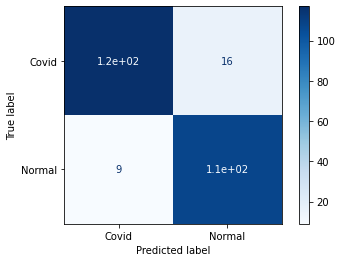

In [235]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)

In [236]:
import io

path='/content/drive/MyDrive/COVID_TA/IM00001.tif'
save_path='/content/drive/MyDrive/COVID_TA/Normal1.tif'
with open(path, 'rb') as f:
    tif = Image.open(io.BytesIO(f.read()))
array=np.array(tif)
max_val=np.amax(array)
normalized=(array/max_val)
im = Image.fromarray(normalized)
im.save(save_path,'TIFF')

In [237]:
width = 224
height = 224
dsize = (width, height)
image_testing = cv2.imread('/content/drive/MyDrive/COVID_TA/Normal1.tif', -1)
image_testing = cv2.cvtColor(image_testing, cv2.COLOR_BGR2RGB)
image_testing = cv2.resize(image_testing,dsize)
image_testing = np.array(image_testing)
image_testing.shape

(224, 224, 3)

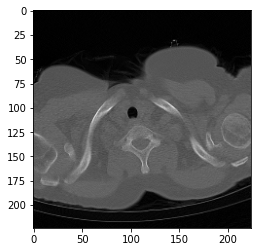

In [238]:
plt.imshow(image_testing)

In [239]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 224, 224, 3)


In [240]:
output = model.predict(image_testing, 1)
output = np.argmax(output,axis=0)
print(output)
print(encoder.classes_[output.argmax(axis=1)])

[[1 2]]
['Normal']
